# Step 7
Context generation

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentContextual import EnvironmentContextual
from Code.environment.Customer import Customer
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.ContextManager import ContextManager

%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 300
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2_sparse.json"
arms = settings.prices

environment = EnvironmentContextual(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm = environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

[array([[0.  , 0.04, 0.8 , 0.04],
       [0.  , 0.49, 0.26, 0.  ],
       [0.03, 0.6 , 0.03, 0.  ],
       [0.04, 0.8 , 0.04, 0.  ],
       [0.01, 0.36, 0.36, 0.01]]), array([[0.  , 0.  , 0.02, 0.5 ],
       [0.  , 0.  , 0.  , 0.7 ],
       [0.  , 0.04, 0.8 , 0.03],
       [0.5 , 0.02, 0.  , 0.  ],
       [0.5 , 0.  , 0.  , 0.  ]]), array([[0.02, 0.5 , 0.02, 0.  ],
       [0.16, 0.16, 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.5 ],
       [0.18, 0.04, 0.  , 0.  ],
       [0.  , 0.17, 0.7 , 0.17]]), array([[0.02, 0.5 , 0.02, 0.  ],
       [0.16, 0.16, 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.5 ],
       [0.18, 0.04, 0.  , 0.  ],
       [0.  , 0.17, 0.7 , 0.17]])]
loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
lo

loading: [===================           ] 61.5%
loading: [===================           ] 62.5%
loading: [====================          ] 63.5%
loading: [====================          ] 64.5%
loading: [====================          ] 65.4%
loading: [====================          ] 66.4%
loading: [=====================         ] 67.4%
loading: [=====================         ] 68.4%
loading: [=====================         ] 69.3%
loading: [======================        ] 70.3%
loading: [======================        ] 71.3%
loading: [======================        ] 72.3%
loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     

loading: [=========                     ] 29.3%
loading: [==========                    ] 30.3%
loading: [==========                    ] 31.2%
loading: [==========                    ] 32.2%
loading: [==========                    ] 33.2%
loading: [===========                   ] 34.2%
loading: [===========                   ] 35.2%
loading: [===========                   ] 36.1%
loading: [============                  ] 37.1%
loading: [============                  ] 38.1%
loading: [============                  ] 39.1%
loading: [=============                 ] 40.0%
loading: [=============                 ] 41.0%
loading: [=============                 ] 42.0%
loading: [=============                 ] 43.0%
loading: [==============                ] 43.9%
loading: [==============                ] 44.9%
loading: [==============                ] 45.9%
loading: [===============               ] 46.9%
loading: [===============               ] 47.9%
loading: [===============               

In [3]:
aggregated_clairvoyant_reward = sum(clairvoyant_reward.values())
aggregated_clairvoyant_reward

18284.1876213345

In [4]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

CONTEXT_INTERVAL = 14
TIME_HORIZON = 300
NUM_ITERATION = 5

In [5]:
#unknown parameters
alphas = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) # uniform
prods_dist = np.ones((n_products,n_arms))   # all 1

customers = copy.deepcopy(environment.customers)

for customer in customers:
    customer.set_distribution_alpha(alphas)
    customer.set_num_prods(prods_dist)

UCB

In [6]:
rewards_iterations = []
aggregated_rewards_iterations  = []

for i in range(NUM_ITERATION):
    ucb4_learner = ContextManager(UCBLearner4, n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % CONTEXT_INTERVAL == 0:
            ucb4_learner.build_context()
            print(str(ucb4_learner.tree))
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb4_learner.select_superarm()
        report = environment.round(super_arm)
        ucb4_learner.update(super_arm.copy(), report)
    rewards = ucb4_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    aggregated_rewards_iterations.append(ucb4_learner.aggregate_rewards)
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>
loading: [                              ] 0.0%
loading: [=                             ] 3.3%
-1<None, None>
loading: [==                            ] 6.7%
0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>
loading: [===                           ] 10.0%
loading: [====                          ] 13.3%
0<-1<None, None>, -1<None, None>>
loading: [=====                         ] 16.7%
0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>
loading: [======                        ] 20.0%
-1<None, None>
loading: [=======                       ] 23.3%
loading: [========                      ] 26.7%
0<-1<None, None>, -1<None, None>>
loading: [=========                     ] 30.0%
0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>
loading: [==========                    ] 33.3%
loading: [===========                   ] 36.7%
0<-1<None, None>, -1<None, 

loading: [============                  ] 40.0%
-1<None, None>
loading: [=============                 ] 43.3%
0<-1<None, None>, -1<None, None>>
loading: [==============                ] 46.7%
loading: [===============               ] 50.0%
0<1<-1<None, None>, -1<None, None>>, -1<None, None>>
loading: [================              ] 53.3%
0<-1<None, None>, 1<-1<None, None>, -1<None, None>>>
loading: [=================             ] 56.7%
loading: [==================            ] 60.0%
-1<None, None>
loading: [===================           ] 63.3%
0<-1<None, None>, -1<None, None>>
loading: [====================          ] 66.7%
0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>
loading: [=====================         ] 70.0%
loading: [======================        ] 73.3%
0<-1<None, None>, -1<None, None>>
loading: [=======================       ] 76.7%
-1<None, None>
loading: [========================      ] 80.0%
loading: [==========================    ] 83.3%
0<-

(5, 300)

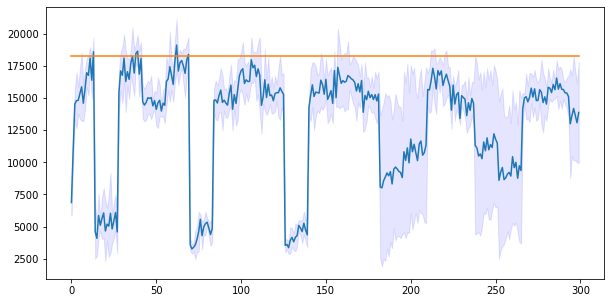

In [7]:
plt.figure(figsize=(10, 5))

mean = np.mean(aggregated_rewards_iterations, axis=0)
stdev = np.std(aggregated_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [aggregated_clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [8]:
features_list = list(clairvoyant_arms.keys())
rewards_iterations_tmp = {}
for features in features_list:
    rewards_iterations_tmp[features] = [[val[features] for val in row] for row in rewards_iterations]
rewards_iterations = rewards_iterations_tmp

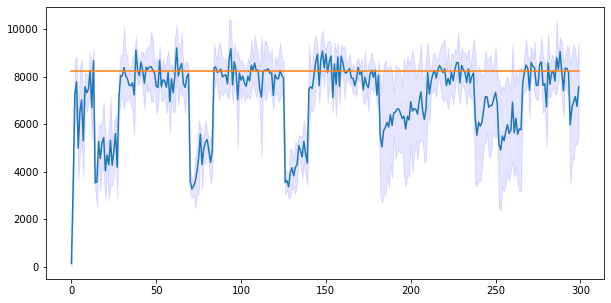

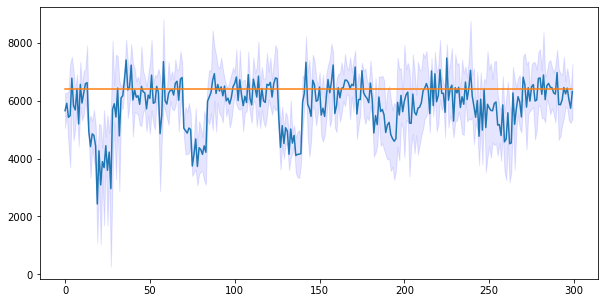

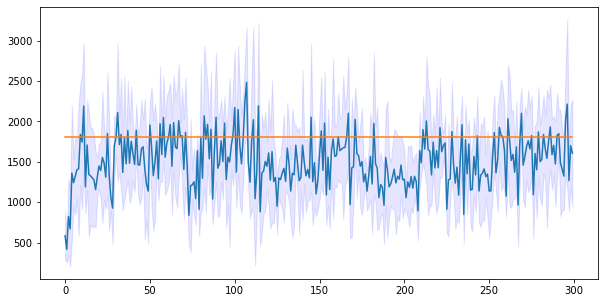

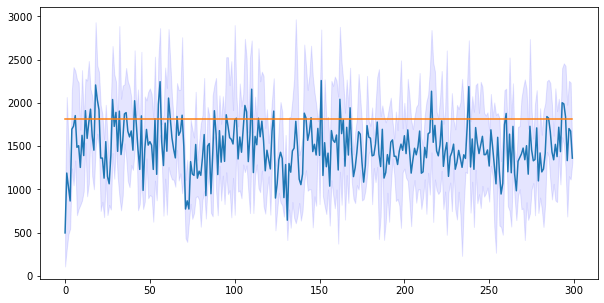

In [9]:
for features in features_list:
    plt.figure(figsize=(10, 5))

    mean = np.mean(rewards_iterations[features], axis=0)
    stdev = np.std(rewards_iterations[features], axis=0)

    plt.plot(range(len(mean)), mean)
    plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

    plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward[features] for _ in range(len(rewards))])
    plt.show()


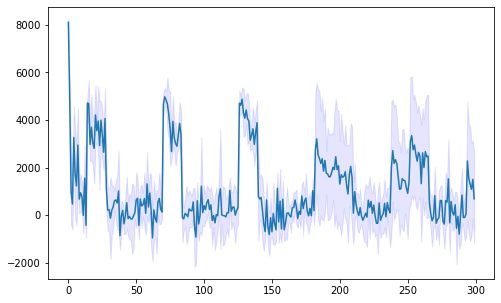

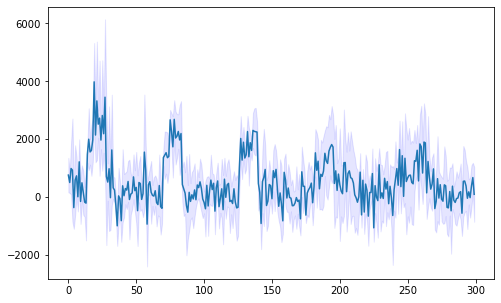

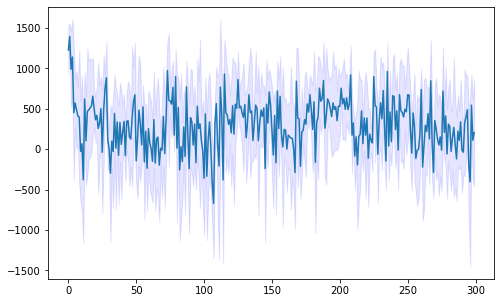

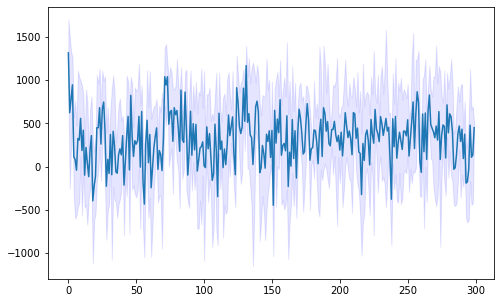

In [10]:
for features in features_list:
    plt.figure(figsize=(8,5))

    regret = clairvoyant_reward[features] - rewards_iterations[features]
    mean_regret = np.mean(regret, axis=0)
    std_regret = np.std(regret, axis=0)

    plt.plot(range(len(mean_regret)), mean_regret)
    plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
    plt.show()

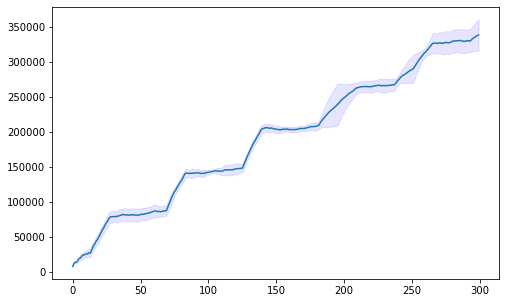

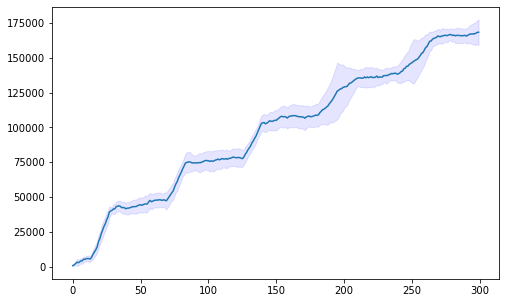

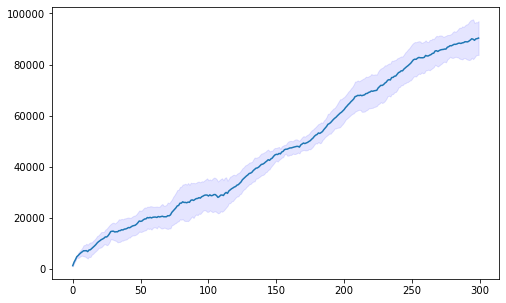

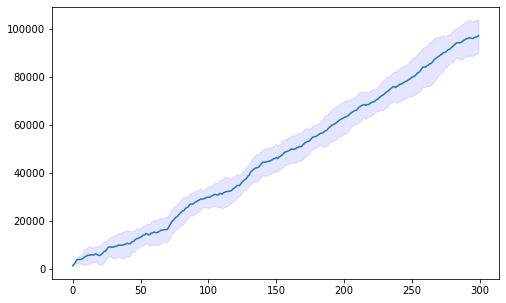

In [11]:
for features in features_list:
    plt.figure(figsize=(8,5))
    regret = clairvoyant_reward[features] - rewards_iterations[features]
    cumulative_regret = np.cumsum(regret, axis=1)
    cum_reg_mean = np.mean(cumulative_regret, axis=0)
    cum_reg_std = np.std(cumulative_regret, axis=0)

    plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
    plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
    plt.show()

TS

In [12]:
rewards_iterations = []
aggregated_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner4 = ContextManager(TSLearner4, n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 14 == 0:
            ts_learner4.build_context()

        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner4.select_superarm()
        report = environment.round(super_arm)
        ts_learner4.update(super_arm.copy(), report)
    rewards = ts_learner4.history_rewards
    rewards_iterations.append(np.array(rewards))
    aggregated_rewards_iterations.append(ts_learner4.aggregate_rewards)

rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%
loading: [=                             ] 3.3%
loading: [==                            ] 6.7%
loading: [===                           ] 10.0%
loading: [====                          ] 13.3%
loading: [=====                         ] 16.7%
loading: [======                        ] 20.0%
loading: [=======                       ] 23.3%
loading: [========                      ] 26.7%
loading: [=========                     ] 30.0%
loading: [==========                    ] 33.3%
loading: [===========                   ] 36.7%
loading: [============                  ] 40.0%
loading: [=============                 ] 43.3%
loading: [==============                ] 46.7%
loading: [===============               ] 50.0%
loading: [================              ] 53.3%
loading: [=================             ] 56.7%
loading: [==================            ] 60.0%
loading: [===================           ] 63.3%
loading: [==================

(5, 300)

In [13]:
features_list = list(clairvoyant_arms.keys())
rewards_iterations_tmp = {}
for features in features_list:
    rewards_iterations_tmp[features] = [[val[features] for val in row] for row in rewards_iterations]
rewards_iterations = rewards_iterations_tmp

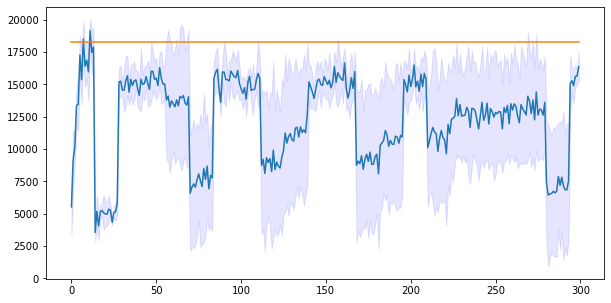

In [14]:
plt.figure(figsize=(10, 5))

mean = np.mean(aggregated_rewards_iterations, axis=0)
stdev = np.std(aggregated_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [aggregated_clairvoyant_reward for _ in range(len(rewards))])
plt.show()


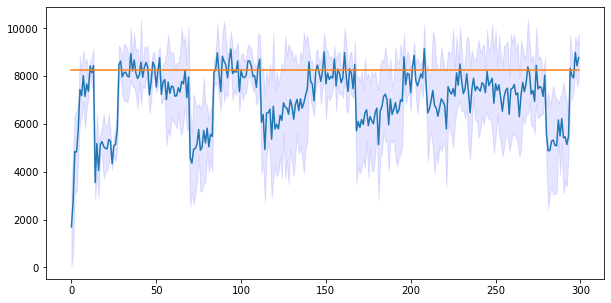

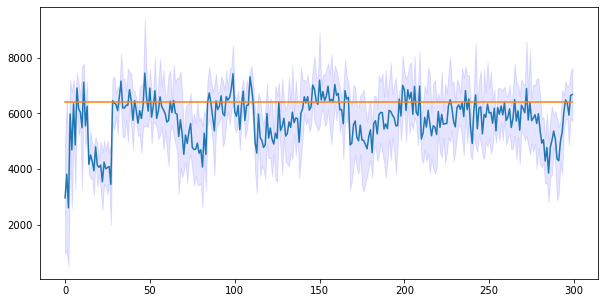

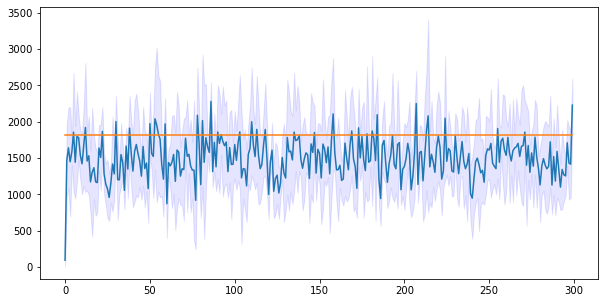

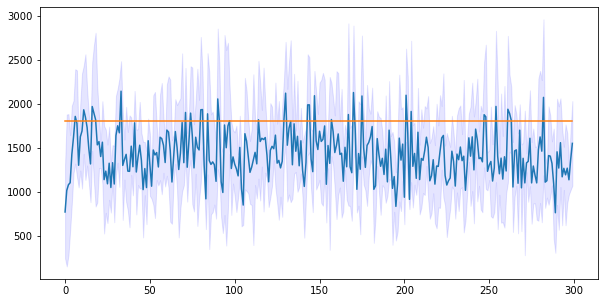

In [15]:
for features in features_list:
    plt.figure(figsize=(10, 5))
    mean = np.mean(rewards_iterations[features], axis=0)
    stdev = np.std(rewards_iterations[features], axis=0)

    plt.plot(range(len(mean)), mean)
    plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

    plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward[features] for _ in range(len(rewards))])
    plt.show()

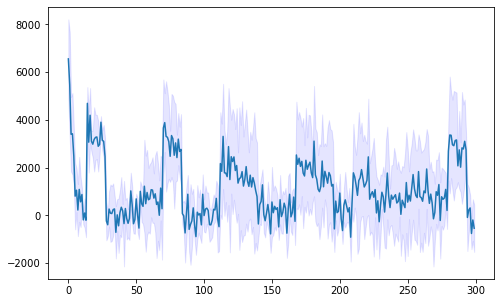

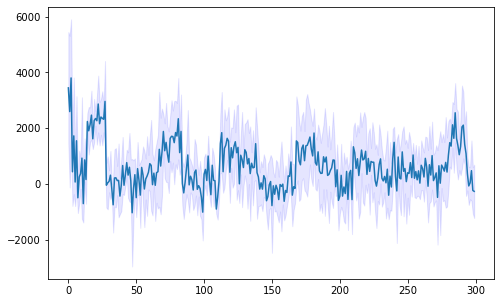

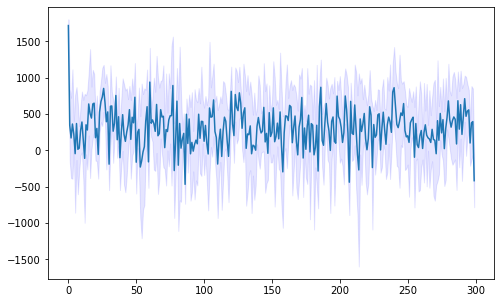

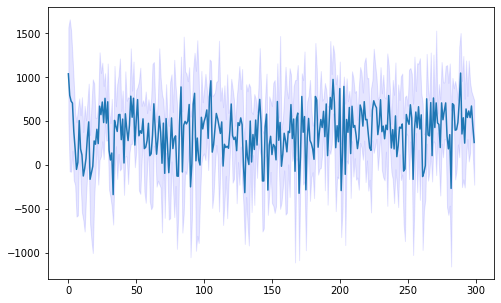

In [16]:
for features in features_list:
    plt.figure(figsize=(8,5))

    regret = clairvoyant_reward[features] - rewards_iterations[features]
    mean_regret = np.mean(regret, axis=0)
    std_regret = np.std(regret, axis=0)

    plt.plot(range(len(mean_regret)), mean_regret)
    plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
    plt.show()

In [17]:
a = np.mean(regret[:,200:], axis=0)
np.shape(a)
print(np.mean(a))

435.1899028800004


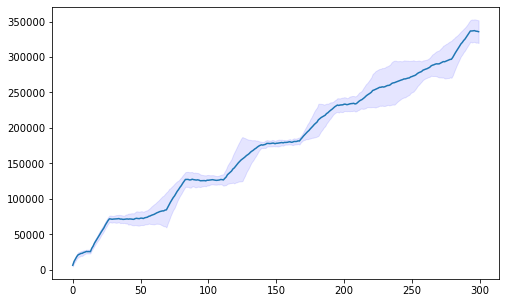

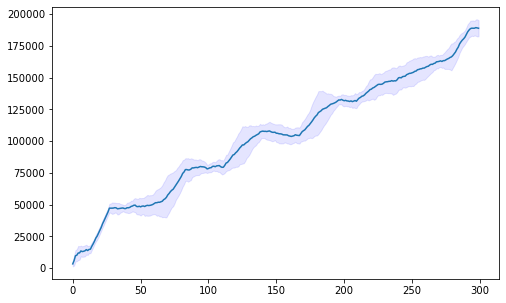

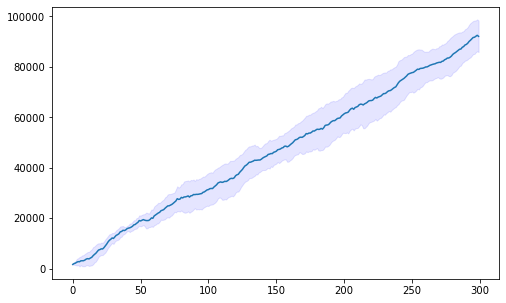

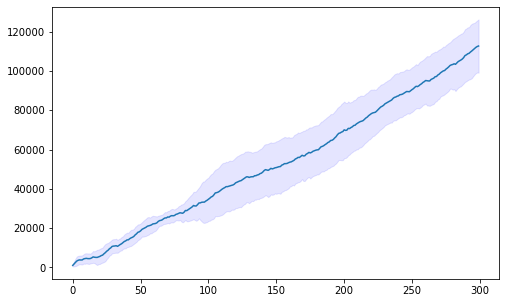

In [18]:
for features in features_list:
    plt.figure(figsize=(8,5))
    regret = clairvoyant_reward[features] - rewards_iterations[features]
    cumulative_regret = np.cumsum(regret, axis=1)
    cum_reg_mean = np.mean(cumulative_regret, axis=0)
    cum_reg_std = np.std(cumulative_regret, axis=0)

    plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
    plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
    plt.show()